### Introdução ao Princípio da Superposição

Este material irá apresentar ao leitor de forma introdutória o conceito da **superposição**, um fenômeno fundamental da mecânica quântica. Iremos usar o **princípio da superposição** para construir os nossos primeiros circuitos quânticos e então realizar algumas interpretações sobre os resultados.

![](https://scx2.b-cdn.net/gfx/news/hires/2014/schrodingers.png)

Primeiro, precisamos definir o que é a **superposição**. De forma abrangente, podemos enunciar o **Princípio da Superposição** da seguinte maneira:

*Dados dois estados admissíveis de um sistema quântico, então a soma desses dois estados também é um estado admissível do sistema*
(JUNIOR, Osvaldo Pessoa. Conceitos de Física Quântica 1. Editora Livraria da Fisica, 2003).

Uma outra interpretação do **Princípio da Superposição** teoricamente assume que um sistema físico pode conter mais de 1 estado existindo simultanamente antes de uma medição (condição onde ocorre o **colapso de onda**).

**Exemplo**: Um elétron é uma partícula subatômica, de modo que consequentemente ele está submetido às **Leis da Mecânica Quântica**. O elétron antes de sofrer uma medição poderá então, teoricamente, estar simultaneamente em mais de um estado possível dada o **Princípio da Superposição**.

**Exemplo**: Se existisse uma porta quântica, ela poderia estar aberta, fechada ou ainda aberta e fechada ao mesmo tempo. Essa última possibilidade, no entanto, só existiria se você não pudesse observar, ou mesmo tocar essa porta. Caso você interagisse de alguma forma com essa “porta quântica”, a superposição simplesmente deixaria de existir. Dessa forma, a natureza colapsaria o estado da porta para as duas possibilidades da situação clássica: aberta ou fechada. (https://mundoeducacao.uol.com.br/fisica/curiosidades-fisica-quantica.htm)

Então, como podemos criar uma **superposição** de estados quânticos em um circuito quântico?
Nós iremos neste material trazer um exemplo básico de como construir um circuito quântico que realiza a superposição de estados.

#### Preparando o cicruito quântico

Para criar um circuito quântico usando python, iremos importar as bibliotecas do qiskit. Qiskit é um SDK de código aberto para trabalhar com computadores quânticos no nível de pulsos, circuitos e módulos de aplicações (https://qiskit.org/).

Geralmente, as seguintes bibliotecas são o suficiente para o início do aprendizado:

In [1]:
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
from qiskit.quantum_info import Statevector

Perceba que nós importamos a biblioteca **numpy** muito utilizada em diversos códigos feitos em python. Também importamos todas as libs fundamentais do **Qiskit** e uma importação do **Statevector** usada para formatar os vetores de saída do processamento analítico quântico.

Agora, para criar o circuito quântico, vamos precisar adicionar **qubits** no circuito. O que são esses **qubits**?

*A estrutura básica de informação na computação clássica é o **bit**, a mesma estrutura análoga na computação quântica é o **bit quântico**, que é usualmente chamado de q-bit (qbit, qubit ou quibit). Um q-bit é um estado quântico da forma:*

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

(DA SILVA, Wagner Jorcuvich Nunes. Uma introdução à Computação Quântica. 2018. Tese de Doutorado. Universidade de São Paulo.)

onde $\alpha$ e $\beta$ são números complexos de modo que $|\alpha|^2 + |\beta|^2 = 1$, ou seja, essas constantes assumem um "papel probabilístico" no estado, onde tais constantes são amplamente chamadas de **amplitudes**.

Agora nós temos aqui o que chamamos de **base computacional quântica** dada pelos estados $|0\rangle$ e $|1\rangle$:

$$|0\rangle = 
\begin{bmatrix} 1 \\ 0 \end{bmatrix}$$ 

$$|1\rangle = 
\begin{bmatrix} 0 \\ 1 \end{bmatrix}$$ 

### O circuito simples

Vamos começar com o básico, iremos criar um circuito com apenas 1 qubit e tentar explorar os resultados dele.

Após a inicialização das bibliotecas, para criar o **circuito quântico**, basta executarmos o seguinte trecho de código:

In [35]:
# Criando um circuito quântico com apenas 1 qubit
quantumCircuit = QuantumCircuit(1) 

Algo muito legal que podemos fazer aqui no nosso circuito quântico é definir qual o **estado de inicialização** do qubit. Para isso, vamos criar uma variável chamada *initial_state*

In [36]:
#Variável que irá inicializar o nosso estado do qubit em 1
initial_state = [0,1]

<font color='red'>Observação: quando iniciarmos um estado, precisamos passar 2 valores numéricos de forma que a soma das amplitudes quadradas seja igual a 1, respeitando a seguinte condição abaixo</font>

$$|\alpha|^2 + |\beta|^2 = 1$$

Agora podemos então chamar a função *initialize* para criar o nosso estado

In [37]:
#Aqui, nós estamos fazendo com que o qubit da posição 0 (0th qubit) assuma o estado |1>
quantumCircuit.initialize(initial_state, 0)

E como fica a visualização deste circuito? Basta usarmos novamente uma outra função do qiskit chamada *draw*:

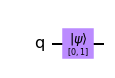

In [38]:
quantumCircuit.draw('mpl')

Temos o circuito implementado, agora, podemos realizar a simulação:

In [39]:
#configurações para iniciar o processamento do circuito quântico
backend = Aer.get_backend('statevector_simulator')
job = backend.run(quantumCircuit)
result = job.result()
outputstate = result.get_statevector(quantumCircuit, decimals=3)

#comandos para realizar a representação formadata dos resultados
state = Statevector.from_int(0, 2**1)
state = state.evolve(quantumCircuit)
state.draw('latex')

<IPython.core.display.Latex object>

Lembrando que um qubit assume a seguinte configuração do seu estado:
    
$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

Então o que o resultado anterior significa? Basicamente o que a nossa variável *initial_state* fez: assumir para o **quibit** o estado $|1\rangle$

O vetor anterior nos diz que $\alpha = 0$ e $\beta = 1$, então, se substituírmos na representação do estado $|\psi\rangle$, temos:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$
$$|\psi\rangle = 0|0\rangle + 1|1\rangle$$
$$|\psi\rangle = 1|1\rangle$$
$$|\psi\rangle = |1\rangle$$

Por fim, vamos agora realizar uma medida do circuito, afinal, a medição é o resultado que nós sempre iremos ter como importante nos circuitos quânticos! A medição é facilmente realizada usando a função *measure_all* como mostrado abaixo:

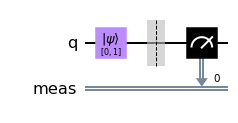

In [40]:
quantumCircuit.measure_all()
quantumCircuit.draw('mpl')

Percebam que agora o nosso circuito tem um medidor do resultado do processamento quântico, que irá nos fornecer o **resultado clássico** da medição do circuito (afinal, não temos acesso à uma medida em superposição). Finalmente, temos o resultado da nossa medida executando o trecho de código abaixo:

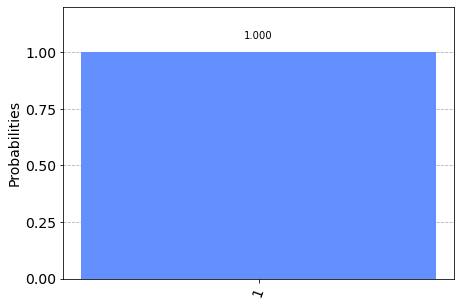

In [41]:
counts = result.get_counts()
plot_histogram(counts)

O que este resultado significa? Ele nos diz que a probabilidade de medirmos o estado $|1\rangle$ é igual à 100%, conforme esperado e demonstrado anteriormente.

**Dica**: você pode realizar uma modificação na variável *initial_state = [0,1]* para *initial_state = [1,0]* e verificar o resultado do histograma, ou então, assumir qualquer valor que respeite:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

$$|\alpha|^2 + |\beta|^2 = 1$$

### Referências

https://qiskit.org/textbook/ch-states/representing-qubit-states.html
